In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car=pd.read_csv(r'C:\Users\ASUS\Downloads\car_evaluation.csv')

In [3]:
car.head()

,buying price,maintenance price,no. of doors,no. of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance price  1728 non-null   object
 2   no. of doors       1728 non-null   object
 3   no. of persons     1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
car.describe()

,buying price,maintenance price,no. of doors,no. of persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
#checking null values(found no nan)
car.isnull().sum()

buying price         0
maintenance price    0
no. of doors         0
no. of persons       0
lug_boot             0
safety               0
decision             0
dtype: int64

In [7]:
# no. of categories in decision col
car['decision'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
#counts of diff value in decision col
car['decision'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64

<AxesSubplot:>

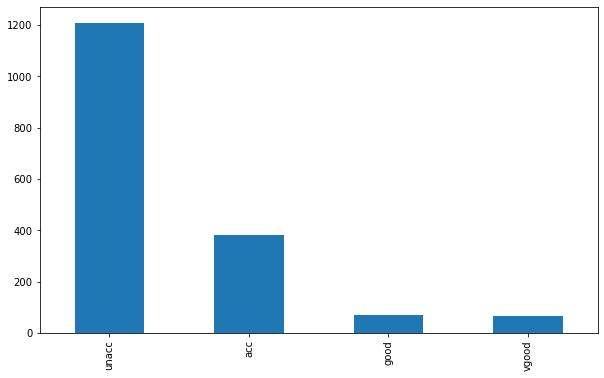

In [9]:
car['decision'].value_counts().plot(kind='bar',figsize=(10,6))

<AxesSubplot:xlabel='decision', ylabel='count'>

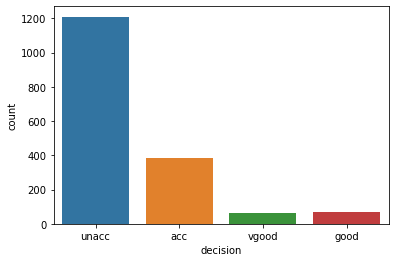

In [10]:
sns.countplot(x=car['decision'],data=car)

<AxesSubplot:xlabel='buying price', ylabel='count'>

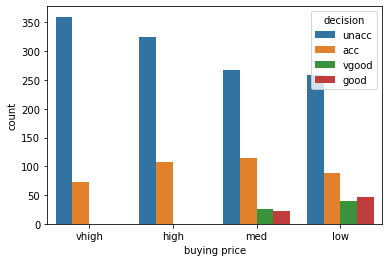

In [11]:
sns.countplot(x='buying price',hue='decision',data=car)

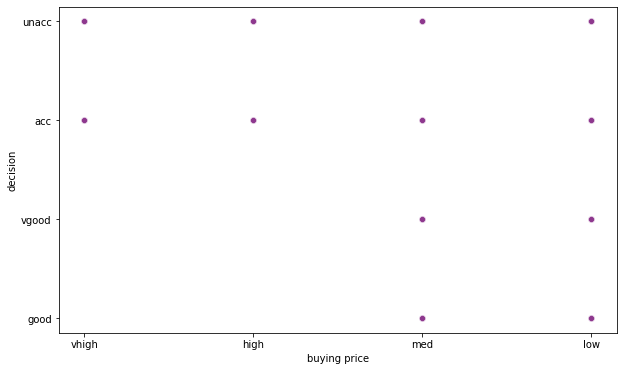

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='buying price',y='decision',data=car,color='#8E388E')
plt.show()

In [13]:
car.head()

,buying price,maintenance price,no. of doors,no. of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [14]:
#converting values into dummies
car_safety=pd.get_dummies(car.drop(['decision'],axis=1),drop_first=True)

In [15]:
car_safety=pd.concat([car_safety,car['decision']],axis=1)

In [16]:
car_safety.head()

,buying price_low,buying price_med,buying price_vhigh,maintenance price_low,maintenance price_med,maintenance price_vhigh,no. of doors_3,no. of doors_4,no. of doors_5more,no. of persons_4,no. of persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,decision
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,unacc
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,unacc
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,unacc
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,unacc
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,unacc


In [17]:
cst=car_safety.drop('decision',axis=1)

<AxesSubplot:>

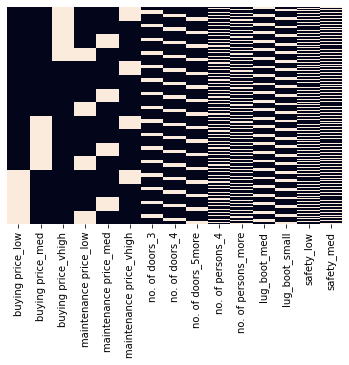

In [18]:
sns.heatmap(cst,cbar=False,yticklabels=False)

In [19]:
car_safety['decision'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [20]:
#mapping numbers of feature decicion
car_safety['decision']=car_safety['decision'].map({'unacc':0,'acc':1,'good':2,'vgood':3}).astype(int)

In [21]:
car_safety.head()

,buying price_low,buying price_med,buying price_vhigh,maintenance price_low,maintenance price_med,maintenance price_vhigh,no. of doors_3,no. of doors_4,no. of doors_5more,no. of persons_4,no. of persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,decision
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=car_safety.drop('decision',axis=1)
y=car_safety['decision']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=10)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [28]:
pred=knn.predict(X_test)

In [29]:
pred

array([0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [30]:
np.size(pred)

571

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       397
           1       0.77      0.50      0.60       129
           2       0.17      0.05      0.08        20
           3       1.00      0.04      0.08        25

    accuracy                           0.80       571
   macro avg       0.69      0.39      0.41       571
weighted avg       0.79      0.80      0.76       571



In [33]:
print(confusion_matrix(y_test,pred))

[[392   5   0   0]
 [ 61  64   4   0]
 [ 13   6   1   0]
 [ 15   8   1   1]]


In [34]:
#calculating accuracy
percent_acc = knn.score(X_test, y_test) * 100

In [35]:
print(percent_acc)

80.21015761821366


In [36]:
print("Accuracy: %3.f" % percent_acc + "%")

Accuracy:  80%


In [37]:
#error rate calculating
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [38]:
error_rate

[0.2434325744308231,
 0.2224168126094571,
 0.1978984238178634,
 0.20140105078809106,
 0.17513134851138354,
 0.20140105078809106,
 0.17162872154115585,
 0.19614711033274956,
 0.19439579684763572,
 0.1978984238178634,
 0.20665499124343256,
 0.19614711033274956,
 0.19439579684763572,
 0.2084063047285464,
 0.20490367775831875,
 0.2136602451838879,
 0.2171628721541156,
 0.2329246935201401,
 0.2276707530647986,
 0.2171628721541156,
 0.23467600700525393,
 0.2224168126094571,
 0.2329246935201401,
 0.23117338003502627,
 0.2381786339754816,
 0.23117338003502627,
 0.23992994746059546,
 0.22942206654991243,
 0.2434325744308231,
 0.24518388791593695,
 0.2469352014010508,
 0.2486865148861646,
 0.2504378283712785,
 0.2521891418563923,
 0.2521891418563923,
 0.2574430823117338,
 0.26444833625218916,
 0.2591943957968476,
 0.26444833625218916]

Text(0, 0.5, 'Error rate')

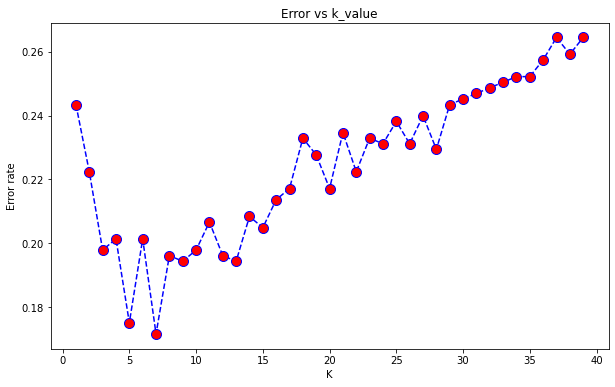

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title("Error vs k_value")
plt.xlabel('K')
plt.ylabel('Error rate')

In [40]:
#retrain new k value with least error rate
k=KNeighborsClassifier(n_neighbors=5)
k.fit(X_train,y_train)
pr=k.predict(X_test)

In [41]:
pr

array([0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [42]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       397
           1       0.72      0.62      0.67       129
           2       0.00      0.00      0.00        20
           3       1.00      0.16      0.28        25

    accuracy                           0.82       571
   macro avg       0.65      0.44      0.46       571
weighted avg       0.81      0.82      0.80       571



In [43]:
percent_acc = k.score(X_test, y_test) * 100

In [44]:
print("Accuracy: %3.f" % percent_acc + "%")

Accuracy:  82%


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,pred)

0.8021015761821366

In [47]:
# we compare predicted and real values creating dataframe

In [48]:
res=({'predicted':pred,
       'real':y_test})
res=pd.DataFrame(res)

In [49]:
res.head()

,predicted,real
599,0,0
1201,2,1
628,0,0
1498,1,1
1263,0,0


In [50]:
# now we built svm model

In [51]:
from sklearn.svm import SVC

In [52]:
model=SVC(kernel='linear',C=1.0)
model.fit(X_train,y_train)

SVC(kernel='linear')

In [53]:
pr=model.predict(X_test)

In [54]:
pr

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 0, 1,
       3, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 2, 3, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0,

In [55]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       397
           1       0.89      0.84      0.86       129
           2       0.75      0.75      0.75        20
           3       0.81      1.00      0.89        25

    accuracy                           0.94       571
   macro avg       0.85      0.89      0.87       571
weighted avg       0.94      0.94      0.93       571



In [56]:
accuracy_score(y_test,pr)

0.9352014010507881

In [57]:
#now we check for Tree and Random Forest 

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
tree=DecisionTreeClassifier(random_state=0)

In [60]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [61]:
tr_pre=tree.predict(X_test)

In [62]:
tr_pre

array([0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0,
       0, 2, 3, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0,

In [63]:
print(classification_report(y_test,tr_pre))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       397
           1       0.86      0.71      0.78       129
           2       0.58      0.75      0.65        20
           3       0.72      0.72      0.72        25

    accuracy                           0.90       571
   macro avg       0.77      0.79      0.78       571
weighted avg       0.90      0.90      0.90       571



In [64]:
accuracy_score(y_test,tr_pre)

0.8984238178633975

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
ft=RandomForestClassifier(random_state=0)
ft.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [67]:
ft_pr=ft.predict(X_test)

In [68]:
ft_pr

array([0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0,
       1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [69]:
print(classification_report(y_test,ft_pr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       397
           1       0.77      0.78      0.77       129
           2       0.38      0.40      0.39        20
           3       0.80      0.32      0.46        25

    accuracy                           0.89       571
   macro avg       0.72      0.62      0.65       571
weighted avg       0.88      0.89      0.88       571



In [70]:
accuracy_score(y_test,ft_pr)

0.8861646234676007

In [71]:
#by comparing score and accuracy of above 4 models we can tell which is the best fit

In [72]:
#SVM